##### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

##### Meet and Greet Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
passengerid = test.PassengerId

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Clean data

In [8]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [9]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [10]:
missing_percentage(train)[missing_percentage(train)['Total'] != 0]    

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [11]:
missing_percentage(test)[missing_percentage(test)['Total'] != 0]   

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24


In [12]:
percent_value_counts(train, 'Sex')

,Total,Percent
male,577,64.76
female,314,35.24


In [13]:
pd.concat([percent_value_counts(train[train['Survived'] == 0], 'Sex'), percent_value_counts(train[train['Survived'] == 1], 'Sex')], axis=1, sort=False)

,Total,Percent,Total,Percent
male,468,85.25,109,31.87
female,81,14.75,233,68.13


In [14]:
train['Sex'] = train.Sex.apply(lambda x: 0 if x == 'male' else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == 'male' else 1)

In [15]:
percent_value_counts(train, 'Cabin')

,Total,Percent
NaN,687,77.10
G6,4,0.45
B96 B98,4,0.45
C23 C25 C27,4,0.45
C22 C26,3,0.34
...,...,...
A32,1,0.11
B101,1,0.11
C118,1,0.11
A10,1,0.11


In [16]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [17]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


### Completing / Deleting missing values in datasets

In [18]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
drop_column = ['PassengerId', 'Cabin', 'Ticket']
train.drop(drop_column, axis=1, inplace=True)
test.drop(drop_column, axis=1, inplace=True)
print(train.isna().sum())
print(test.isna().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [19]:
train.shape, test.shape

((891, 9), (418, 8))

#####  feature engineering

In [20]:
datasets = [train, test]

In [21]:
for dataset in datasets:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1 # initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
stat_min = 10
title_names = (train['Title'].value_counts() < stat_min)
    
train['Title'] = train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] else x)
print(train['Title'].value_counts())
print('-'*10)
    
train.info()
test.info()
train.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(7), object(3)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null int64
Age           418 non-null float

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
810,0,3,"Alexander, Mr. William",0,26.0,0,0,7.8875,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
58,1,2,"West, Miss. Constance Mirium",1,5.0,1,2,27.7500,S,4,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
86,0,3,"Ford, Mr. William Neal",0,16.0,1,3,34.3750,S,5,0,Mr,"(31.0, 512.329]","(-0.08, 16.0]"
311,1,1,"Ryerson, Miss. Emily Borie",1,18.0,2,2,262.3750,C,5,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
158,0,3,"Smiljanic, Mr. Mile",0,28.0,0,0,8.6625,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
97,1,1,"Greenfield, Mr. William Bertram",0,23.0,0,1,63.3583,C,2,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"
599,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,49.0,1,0,56.9292,C,2,0,Misc,"(31.0, 512.329]","(48.0, 64.0]"
342,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
833,0,3,"Augustsson, Mr. Albert",0,23.0,0,0,7.8542,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
151,1,1,"Pears, Mrs. Thomas (Edith Wearne)",1,22.0,1,0,66.6000,S,2,0,Mrs,"(31.0, 512.329]","(16.0, 32.0]"


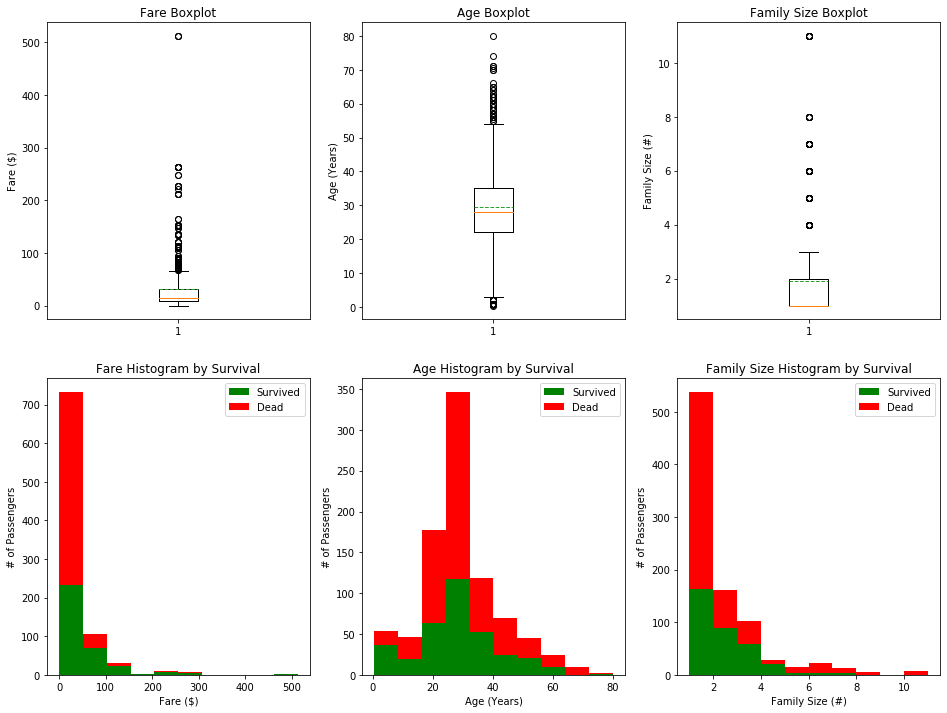

In [22]:
plt.figure(figsize=[16,12])
plt.subplot(231)
plt.boxplot(x=train['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(train['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(train['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [train[train['Survived']==1]['FamilySize'], train[train['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()


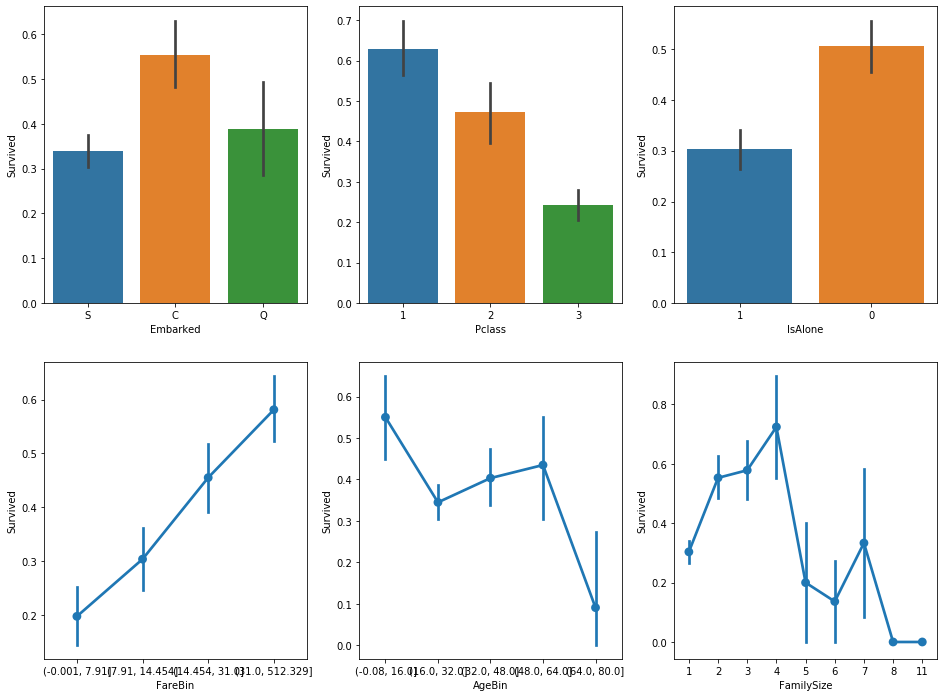

In [23]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=train, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=train, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=train, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=train, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=train, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

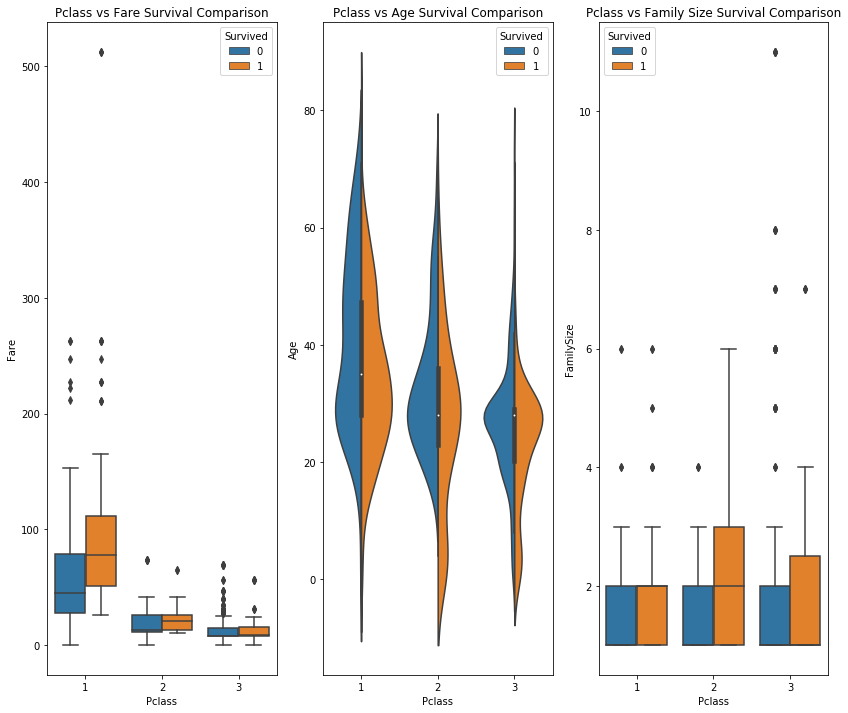

In [24]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = train, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1, 'Sex vs IsAlone Survival Comparison')

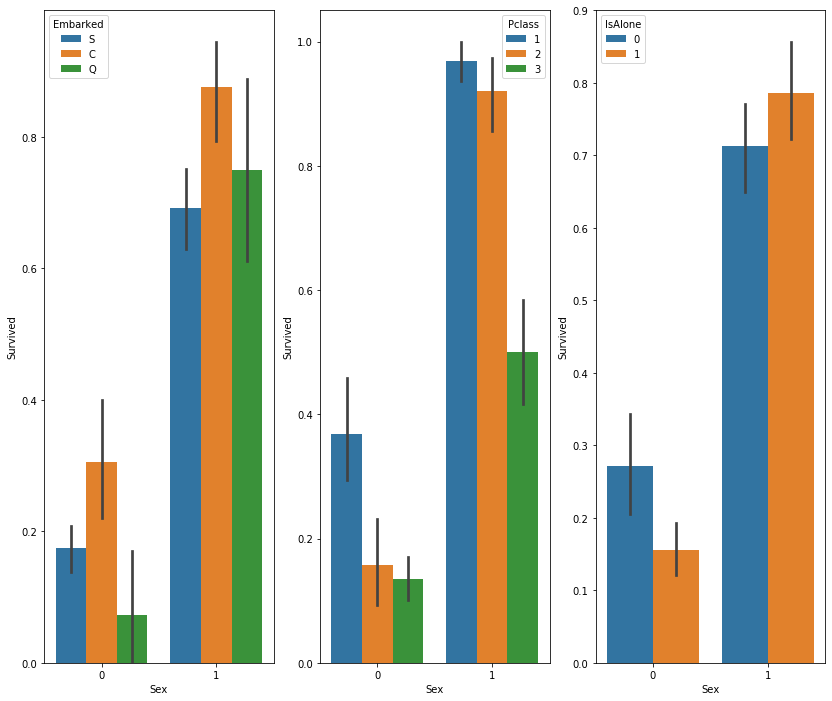

In [25]:
fig, qaxis = plt.subplots(1, 3, figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=train, ax=qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=train, ax=qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=train, ax=qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


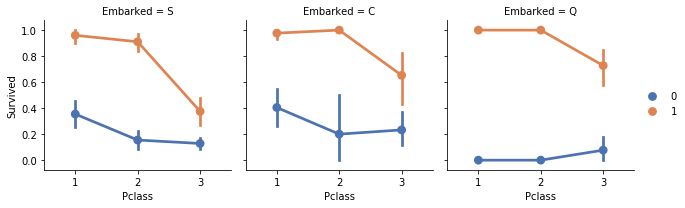

In [26]:
e = sns.FacetGrid(train, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


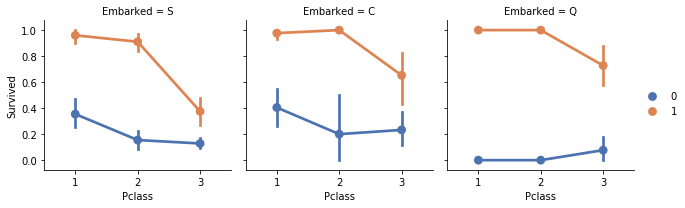

In [27]:
e = sns.FacetGrid(train, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep')
e.add_legend()

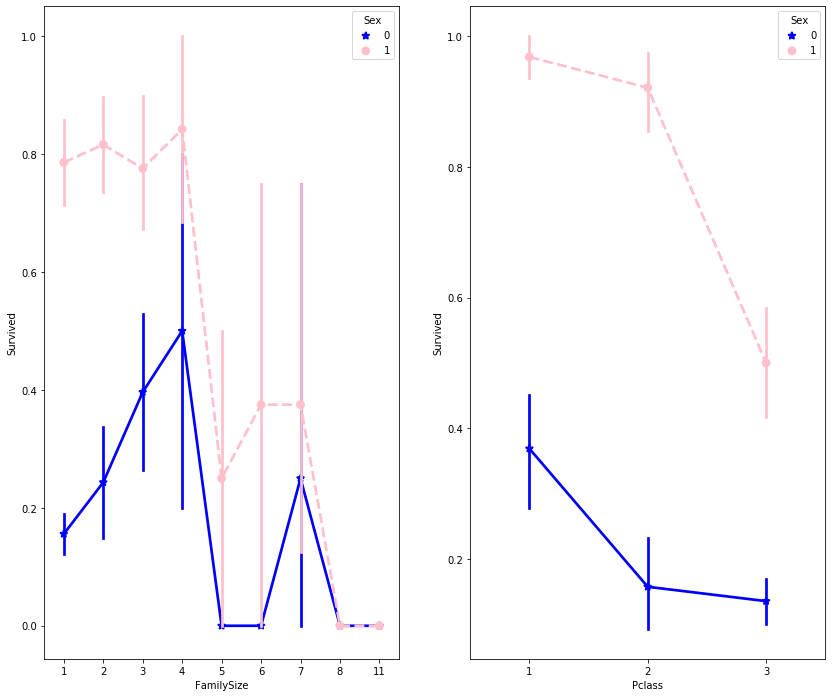

In [28]:
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=train,
              palette={0: "blue", 1: "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train,
              palette={0: "blue", 1: "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

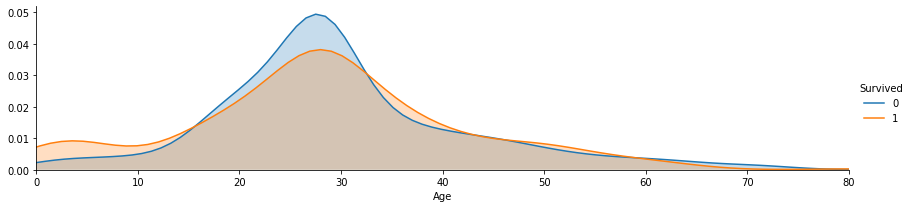

In [29]:
a = sns.FacetGrid(train, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, train['Age'].max()))
a.add_legend()

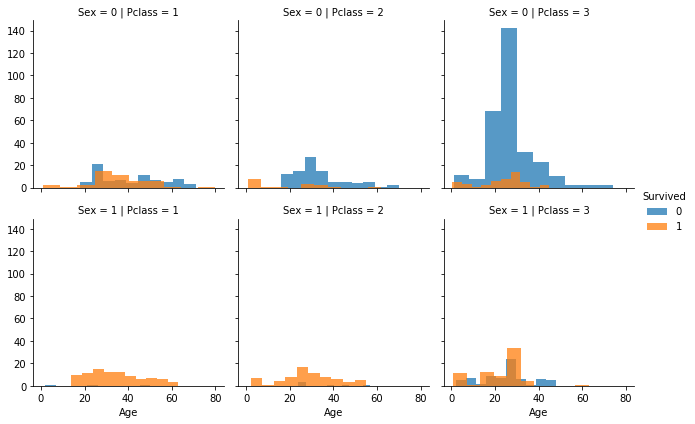

In [30]:
h = sns.FacetGrid(train, row = 'Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

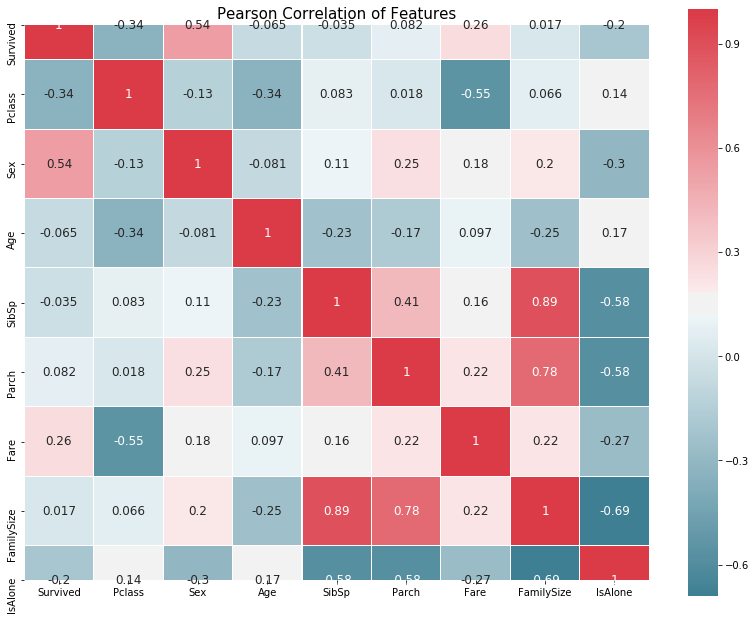

In [31]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(7), object(3)
memory usage: 85.8+ KB


In [33]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,646,72.50
C,168,18.86
Q,77,8.64


In [34]:
train.sample(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
600,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",1,24.0,2,1,27.0000,S,4,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
394,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",1,24.0,0,2,16.7000,S,3,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,52.5542,S,3,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
812,0,2,"Slemen, Mr. Richard James",0,35.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
391,1,3,"Jansson, Mr. Carl Olof",0,21.0,0,0,7.7958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
116,0,3,"Connors, Mr. Patrick",0,70.5,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(64.0, 80.0]"


In [35]:
def refill_Embarked(df):
    for i in range(len(df.Embarked)):
        if df.Embarked.loc[i] == 'S':
            df.Embarked.loc[i] = 1
        elif df.Embarked.loc[i] == 'C':
            df.Embarked.loc[i] = 2
        elif df.Embarked.loc[i] == 'Q':
            df.Embarked.loc[i] = 3

In [36]:
refill_Embarked(train)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
refill_Embarked(test)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
train.drop('Name', axis=1, inplace=True); test.drop('Name', axis=1, inplace=True)

In [39]:
train.drop('Title', axis=1, inplace=True); test.drop('Title', axis=1, inplace=True)

In [40]:
print(train.shape)
train.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(8)
memory usage: 71.9 KB


In [41]:
print(test.shape)
test.info()

(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null int64
FamilySize    418 non-null int64
IsAlone       418 non-null int64
FareBin       418 non-null category
AgeBin        418 non-null category
dtypes: category(2), float64(2), int64(7)
memory usage: 30.8 KB


In [42]:
percent_value_counts(train,'Embarked')

,Total,Percent
1,646,72.50
2,168,18.86
3,77,8.64


In [43]:
train.drop('FareBin', axis=1, inplace=True); test.drop('FareBin', axis=1, inplace=True)
train.drop('AgeBin', axis=1, inplace=True); test.drop('AgeBin', axis=1, inplace=True)

In [44]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,1.361392,1.904602,0.602694
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673,1.613459,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,11.000000,1.000000


In [45]:
def scaling(df):
    for feature in df.columns:
        if str(df.columns) == 'Fare':
            df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
        else:
            df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

In [46]:
scaling(train), scaling(test);

In [47]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.352413,0.363679,0.065376,0.063599,0.062858,0.180696,0.090460,0.602694
std,0.486592,0.418036,0.477990,0.163605,0.137843,0.134343,0.096995,0.317837,0.161346,0.489615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.346569,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,0.500000,0.100000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

In [49]:
X.shape, y.shape

((891, 9), (891,))

In [50]:
X.columns, test.columns

(Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
        'FamilySize', 'IsAlone'],
       dtype='object'),
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
        'FamilySize', 'IsAlone'],
       dtype='object'))

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### Training model

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

from sklearn import model_selection
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error

In [69]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
print(mean_absolute_error(lin_reg_model.predict(X_test), y_test))

0.30809755811271633


In [70]:
tree_reg_model = DecisionTreeClassifier()
tree_reg_model.fit(X_train, y_train)
print(mean_absolute_error(tree_reg_model.predict(X_test), y_test))

0.25139664804469275


In [55]:
"""
test_prediction = log_reg_model.predict(test)
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic2_submission.csv", index=False)
"""

'\ntest_prediction = log_reg_model.predict(test)\nsubmission = pd.DataFrame({\n        "PassengerId": passengerid,\n        "Survived": test_prediction\n    })\n\nsubmission.PassengerId = submission.PassengerId.astype(int)\nsubmission.Survived = submission.Survived.astype(int)\n\nsubmission.to_csv("titanic2_submission.csv", index=False)\n'

In [56]:
#!kaggle competitions submit -c titanic -f titanic2_submission.csv -m "Titanic"